# Devoir 5, Question 3 : Méthodes par ensemble

# Homework 5, Question 3: Ensemble methods

## Code préambule

## Preamble code

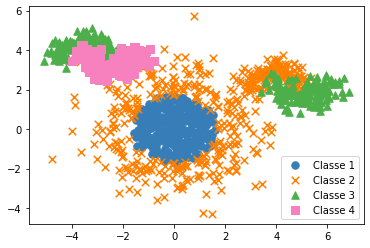

In [12]:
import time
import numpy
import warnings
import pickle as pkl
import io
import pandas

# Nous ne voulons pas avoir ce type d'avertissement, qui
# n'est pas utile dans le cadre de ce devoir.
# We do not want to have this type of warning, which
# is not useful in the context of this assignment.
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles, make_moons

# Fonctions utilitaires liées à l'évaluation
# Utility functions related to evaluation
_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!") 

# Définition des durées d'exécution maximales pour chaque sous-question
# Definition of maximum execution times for each sub-question
TMAX_Q3A_1 = 60
TMAX_Q3A_2 = 60
TMAX_Q3C = 130

# Création du jeu de données moon, utilisé pour la question
# Creation of the moon dataset, used for the question
X1, y1 = make_gaussian_quantiles(cov=2.2,
                                 n_samples=600, n_features=2,
                                 n_classes=2, random_state=42)
X2, y2 = make_moons(n_samples=300, noise=0.25, random_state=42)
X3, y3 = make_moons(n_samples=300, noise=0.3, random_state=42)
X2[:, 0] -= 3.5
X2[:, 1] += 3.5
X3[:, 0] += 4.0
X3[:, 1] += 2.0
X = numpy.concatenate((X1, X2, X3))
y = numpy.concatenate((y1, y2+2, y3+1))

# Partition du jeu en entraînement/test.
# Partition into training/testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

# Pour visualiser le jeu de données
# For visualizing the dataset
colors = numpy.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])
pyplot.figure()
pyplot.scatter(X[:,0][y==0], X[:,1][y==0], marker='o', s=56, c=colors[0], label="Classe 1")
pyplot.scatter(X[:,0][y==1], X[:,1][y==1], marker='x', s=56, c=colors[1], label="Classe 2")
pyplot.scatter(X[:,0][y==2], X[:,1][y==2], marker='^', s=56, c=colors[2], label="Classe 3")
pyplot.scatter(X[:,0][y==3], X[:,1][y==3], marker='s', s=56, c=colors[3], label="Classe 4")
pyplot.legend()
pyplot.show()

## Q3A
Évaluer la performance d’un classifieur par ensemble basé sur *AdaBoost*, en utilisant comme classifieurs de base (*weak learners*) :
- Des souches de décisions (arbres de décision à un seul niveau (`DecisionTreeClassifier(max_depth=1)`));
- Des arbres de décisions à trois niveaux (`DecisionTreeClassifier(max_depth=3)`).

Dans les deux cas, utilisez un maximum de 50 classifieurs de base (`n_estimators=50`). Faites votre entraînement sur le jeu de données *moons* créé dans le préambule.

Pour ces deux configurations, rapportez les résultats à l’aide des figures suivantes :
- Un graphique de la performance en entraînement et test en fonction du nombre de classifieurs de base utilisés (de 1 à 50);
- Des figures montrant les régions de décision de l’ensemble pour différentes valeurs représentatives du nombre de classifieurs de base et les points du jeu de données. Assurez-vous d’utiliser des couleurs similaires pour les régions et les marqueurs.

**Note** : les fonctions `staged_predict` et `staged_score` fournies par `AdaBoostClassifier` pourraient vous être très utiles ici pour réduire la complexité des calculs.

## Q3A
Evaluate the performance of an ensemble classifier based on *AdaBoost* to generate basic classifiers (*weak learners*):
- Decision lines (one level decision trees (`DecisionTreeClassifier(max_depth=1)`));
- Three levels decision trees(`DecisionTreeClassifier(max_depth=3)`).

In both cases, use a maximum of 50 base classifiers (`n_estimators=50`). Do your training on the *moons* dataset created in the preamble.

For these two configurations, report the results using the following figures:
- A graph of the performance in training and testing according to the number of basic classifiers used (from 1 to 50);
- Figures showing the decision regions of the set for different values representative of the number of base classifiers and the points in the dataset. Be sure to use similar colors for regions and markers.

**Note**: The `staged_predict` and `staged_score` functions provided by `AdaBoostClassifier` could be very useful here to reduce the complexity of the calculations.

### Entrez votre solution à Q3A dans la cellule suivante, en vous basant sur le patron de code donné plus bas.

### Enter your answer to Q3A in the following cell, starting from the code template given below.

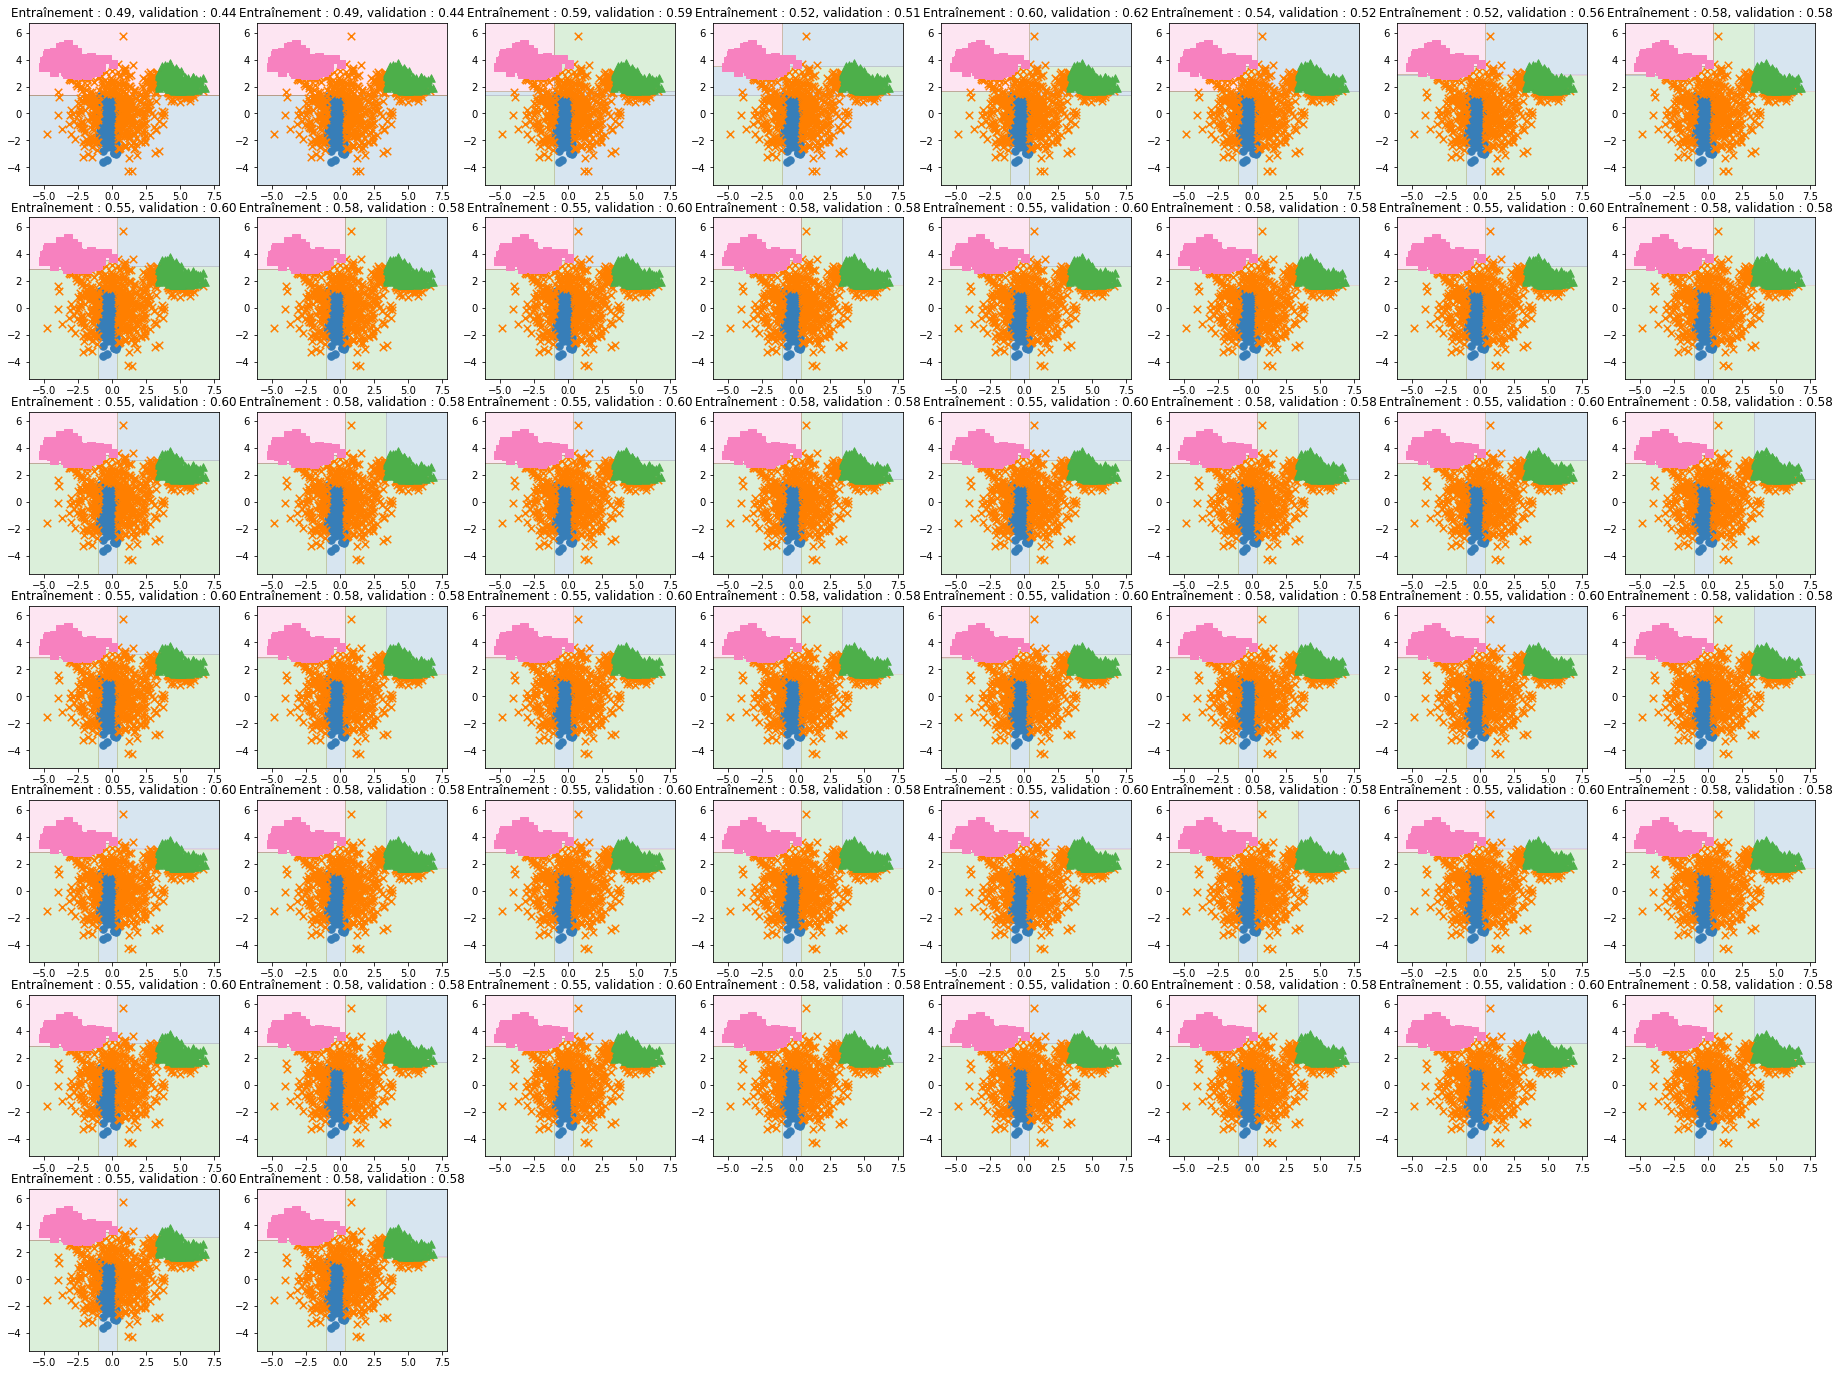

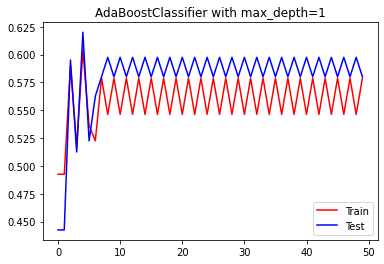

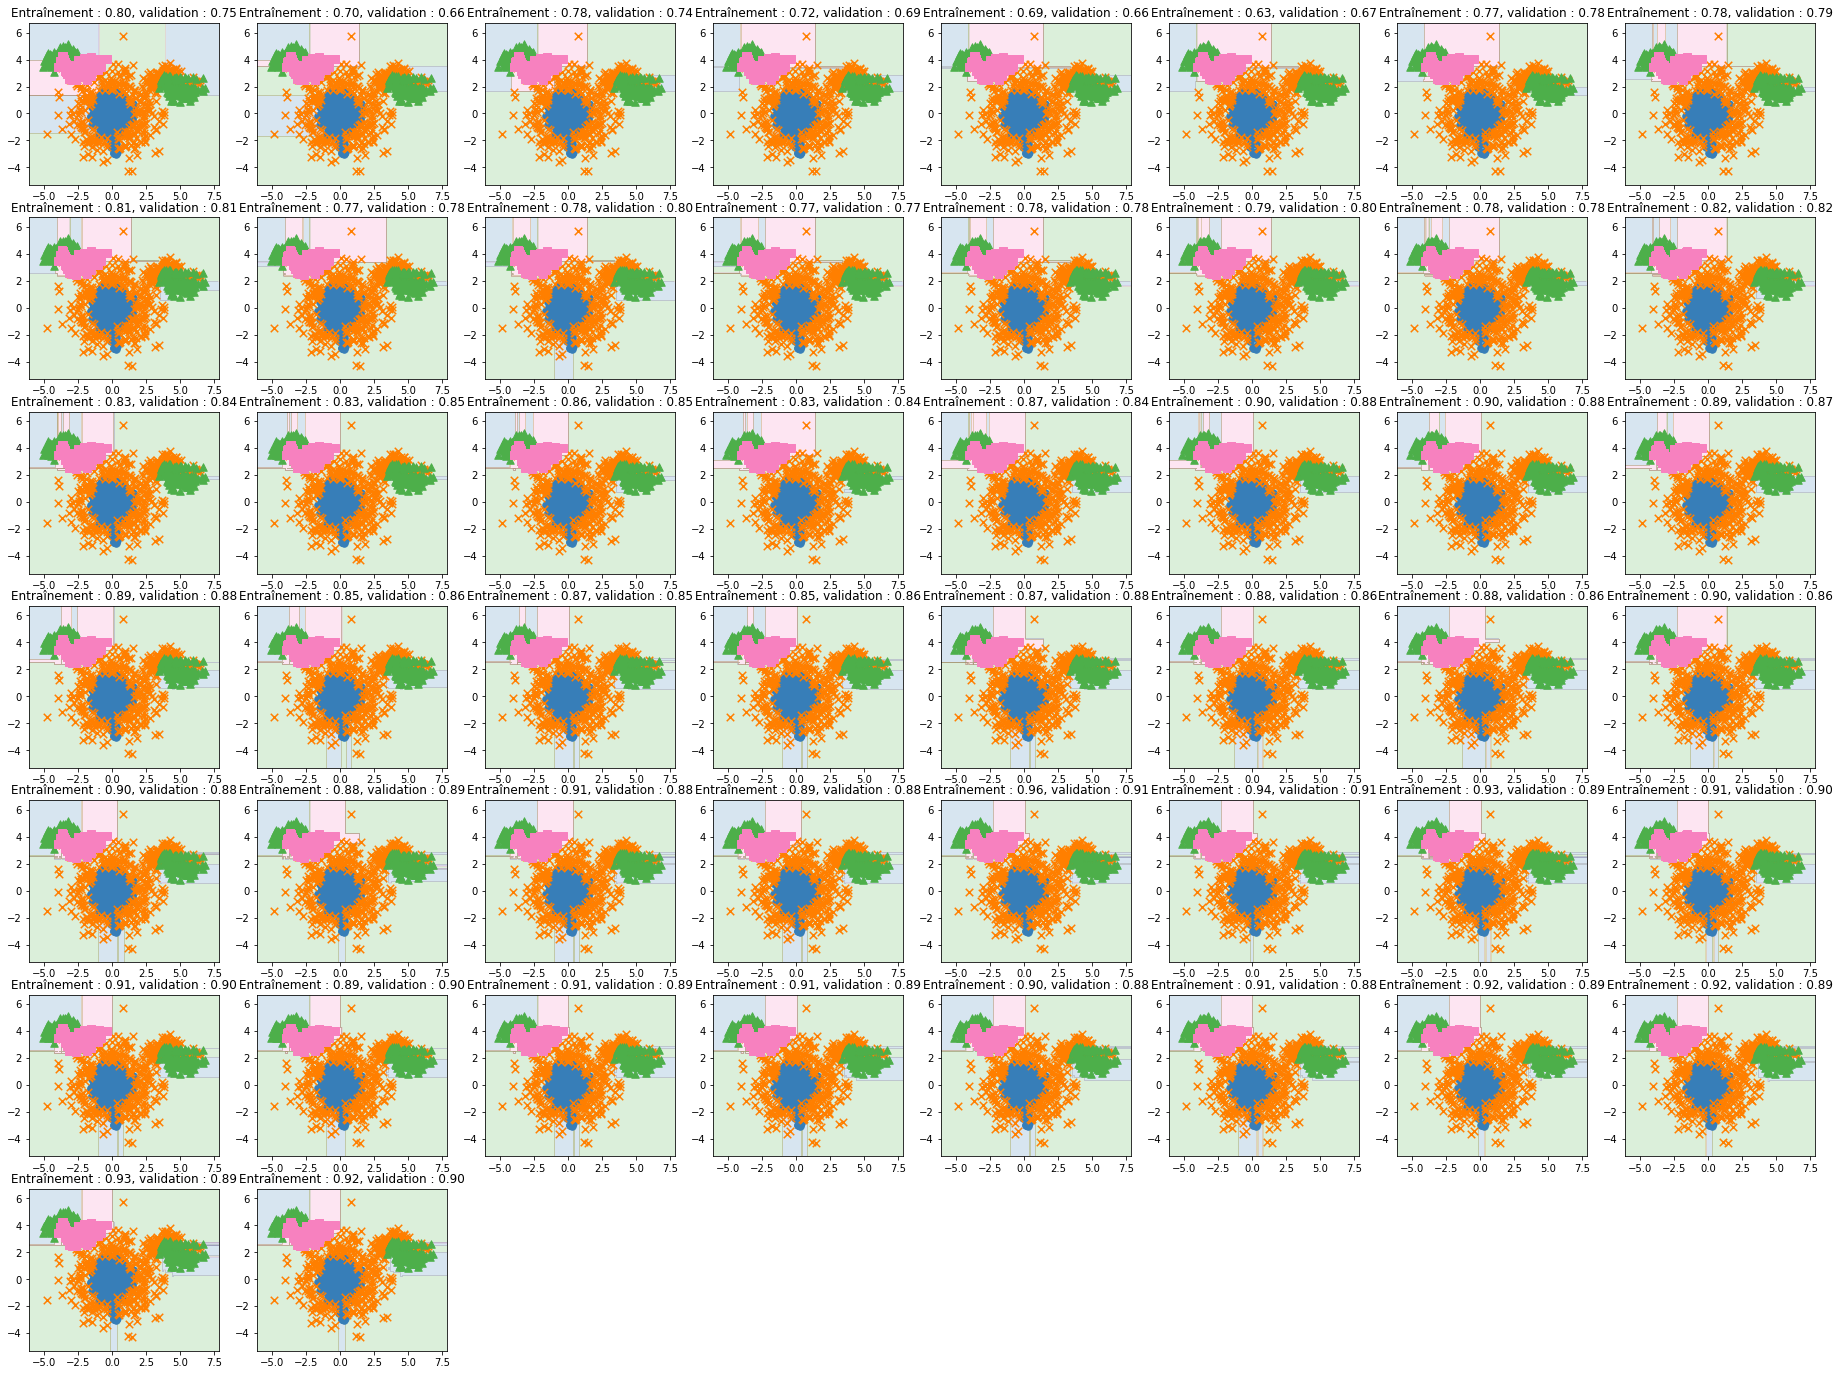

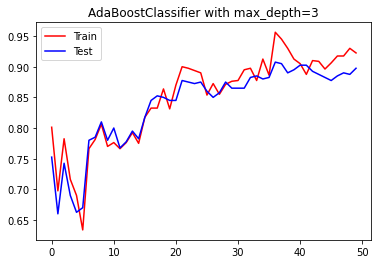

In [14]:
# === Souches de décision / decision stumps ===

_times.append(time.time())

# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des souches de décision comme classifieur de base. 
# Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train) defined above, using decision
# stumps as basic classifiers. Report the results and figures as asked in the statement, on the training
# and testing sets.
# ******
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=0)
clf.fit(X_train, y_train)

predicted_zs = [z for z in clf.staged_predict(numpy.c_[xx.ravel(), yy.ravel()])]

train_scores = [s for s in clf.staged_score(X_train, y_train)]
test_scores = [s for s in clf.staged_score(X_test, y_test)]

# Utilisez subplot pour générer les régions de décisions (50 dans l'exemple ici)
# Use subplot to generate decision regions (50 in the example here)
pyplot.figure(figsize=(32, 28))
for i in range(50):
    pyplot.subplot(8, 8, 1 + i)
    pyplot.title("Entraînement : {:.2f}, validation : {:.2f}".format(train_scores[i], test_scores[i]))

    Z = predicted_zs[i]
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=tuple(colors[:4]), alpha=0.2)

    y_hat = clf.predict(X).reshape(-1)      
    pyplot.scatter(X[:,0][y_hat==0], X[:,1][y_hat==0], marker='o', s=56, c=colors[0])
    pyplot.scatter(X[:,0][y_hat==1], X[:,1][y_hat==1], marker='x', s=56, c=colors[1])
    pyplot.scatter(X[:,0][y_hat==2], X[:,1][y_hat==2], marker='^', s=56, c=colors[2])
    pyplot.scatter(X[:,0][y_hat==3], X[:,1][y_hat==3], marker='s', s=56, c=colors[3])
    
pyplot.show()
pyplot.figure()

# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******
pyplot.plot(range(50), train_scores, c="red", label="Train")
pyplot.plot(range(50), test_scores, c="blue", label="Test")

pyplot.legend()
pyplot.title("AdaBoostClassifier with max_depth=1")

_times.append(time.time())
checkTime(TMAX_Q3A_1, "3A_1")
pyplot.show()


# === Arbres de décision à 3 niveau / Decision trees with 3 levels ===
_times.append(time.time())

# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des arbres de décision de profondeur 3 comme 
# classifieur de base. Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train)
# defined above, using depth 3 decision trees as the 
# basic classifiers. Report results and figures as requested in the statement, on
# the training and test sets.
# ******
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=0)
clf.fit(X_train, y_train)

predicted_zs = [z for z in clf.staged_predict(numpy.c_[xx.ravel(), yy.ravel()])]

train_scores = [s for s in clf.staged_score(X_train, y_train)]
test_scores = [s for s in clf.staged_score(X_test, y_test)]

# Utilisez subplot pour générer les régions de décisions (50 dans l'exemple ici)
# Use subplot to generate decision regions (50 in the example here)
pyplot.figure(figsize=(32, 28))
for i in range(50):
    pyplot.subplot(8, 8, 1 + i)
    pyplot.title("Entraînement : {:.2f}, validation : {:.2f}".format(train_scores[i], test_scores[i]))

    Z = predicted_zs[i]
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=tuple(colors[:4]), alpha=0.2)

    y_hat = clf.predict(X).reshape(-1)      
    pyplot.scatter(X[:,0][y_hat==0], X[:,1][y_hat==0], marker='o', s=56, c=colors[0])
    pyplot.scatter(X[:,0][y_hat==1], X[:,1][y_hat==1], marker='x', s=56, c=colors[1])
    pyplot.scatter(X[:,0][y_hat==2], X[:,1][y_hat==2], marker='^', s=56, c=colors[2])
    pyplot.scatter(X[:,0][y_hat==3], X[:,1][y_hat==3], marker='s', s=56, c=colors[3])

pyplot.show()
pyplot.figure()

# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******
pyplot.plot(range(50), train_scores, c="red", label="Train")
pyplot.plot(range(50), test_scores, c="blue", label="Test")

pyplot.legend()
pyplot.title("AdaBoostClassifier with max_depth=3")

_times.append(time.time())
checkTime(TMAX_Q3A_2, "3A_2")
pyplot.show()

### Patron de code réponse à l'exercice Q3A

### Q3A answer code template

In [ ]:
# === Souches de décision / decision stumps ===

_times.append(time.time())

# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des souches de décision comme classifieur de base. 
# Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train) defined above, using decision
# stumps as basic classifiers. Report the results and figures as asked in the statement, on the training
# and testing sets.
# ******

# Utilisez subplot pour générer les régions de décisions (50 dans l'exemple ici)
# Use subplot to generate decision regions (50 in the example here)
pyplot.figure(figsize=(32, 28))
for i in range(50):
    pyplot.subplot(8, 8, 1 + i)
    pyplot.title("Entraînement : {:.2f}, validation : {:.2f}".format(0.0, 0.0))
    
pyplot.show()
pyplot.figure()

# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******

_times.append(time.time())
checkTime(TMAX_Q3A_1, "3A_1")
pyplot.show()


# === Arbres de décision à 3 niveau / Decision trees with 3 levels ===
_times.append(time.time())

# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des arbres de décision de profondeur 3 comme 
# classifieur de base. Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train)
# defined above, using depth 3 decision trees as the 
# basic classifiers. Report results and figures as requested in the statement, on
# the training and test sets.
# ******

# Utilisez subplot pour générer les régions de décisions (50 dans l'exemple ici)
# Use subplot to generate decision regions (50 in the example here)
pyplot.figure(figsize=(32, 28))
for i in range(50):
    pyplot.subplot(8, 8, 1 + i)
    pyplot.title("train : {:.2f}, valid : {:.2f}".format(0.0, 0.0))

pyplot.show()
pyplot.figure()

# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******

_times.append(time.time())
checkTime(TMAX_Q3A_2, "3A_2")
pyplot.show()

## Q3B
En guise d'analyse des résultats obtenus à Q3A, veuillez répondre aux points suivants:
1. Expliquez si les classifieurs de type souches de décisions sont appropriés pour ce genre de problème.
2. Donnez le nombre de classifieurs qui apparaît optimal pour ce jeu de données.
3. Expliquez pourquoi il existe, en fin d’apprentissage, des zones de l’espace de recherche ne comportant que des exemples d’une classe en entraînement, mais faisant néanmoins partie des régions de décision d’autres classes.

## Q3B
To analyze the results obtained in Q3A, please respond to the following:
1. Explain whether decision stump classifiers are appropriate for this type of problem.
2. Give the number of classifiers that appears optimal for this dataset.
3. Explain why there are areas of the search space at the end of training that have only examples of one class in training, but are nevertheless part of the decision regions of other classes.

### Entrez votre solution à Q3B dans la cellule ci-dessous
Patron de réponse en format markdown:
~~~md
1. Expliquez si les classifieurs de type souches de décisions sont appropriés pour ce genre de problème.
***Donnez ici vos explications au point 1***

2. Donnez le nombre de classifieurs qui apparaît optimal pour ce jeu de données.
***Donnez ici vos explications au point 2***

3. Expliquez pourquoi il existe, en fin d’apprentissage, des zones de l’espace de recherche ne comportant que des exemples d’une classe en entraînement, mais faisant néanmoins partie des régions de décision d’autres classes.
***Donnez ici vos explications au point 3***
~~~

### Enter your solution to Q3B in the cell below
Markdown answer template:
~~~md
1. Explain whether decision stump classifiers are appropriate for this type of problem.
***Give here your explanations to point 1***

2. Give the number of classifiers that appears optimal for this dataset.
***Give here your explanations to point 2***

3. Explain why there are areas of the search space at the end of training that have only examples of one class in training, but are nevertheless part of the decision regions of other classes.
***Give here your explanations to point 3***
~~~

1. Expliquez si les classifieurs de type souches de décisions sont appropriés pour ce genre de problème. / Explain whether decision stump classifiers are appropriate for this type of problem.
Non, parceque les zones de décisions ne sont pas bien délimitées

2. Donnez le nombre de classifieurs qui apparaît optimal pour ce jeu de données. / Give the number of classifiers that appears optimal for this dataset.
36

3. Expliquez pourquoi il existe, en fin d’apprentissage, des zones de l’espace de recherche ne comportant que des exemples d’une classe en entraînement, mais faisant néanmoins partie des régions de décision d’autres classes. / Explain why there are areas of the search space at the end of training that have only examples of one class in training, but are nevertheless part of the decision regions of other classes.
Parce que le modèle a fait du surapprentissage

Expliquez pourquoi un algorithme de sélection arrière séquentielle est souvent préféré à un algorithme de sélection avant séquentielle pour des données comportant des dépendances non-linéaires complexes entre les variables. / Explain why a sequential backward selection algorithm is often preferred over a sequential forward selection algorithm for data with complex nonlinear dependencies between variables.
Donnez ici vos explications au point 2 / Give here your explanations to point 2 La sélection arrière séquentielle repose sur le principe de considérer toutes les variables pour éliminer ensuite les liens non linéaires. Cette approche permet d'avoir une idée sur l'impact de chaque feature sur la performance. Tandis que la sélection avant part d'une liste vide pour ajouter les variables au fur et à mesure; cela ne permet pas d'avoir une idée sur l'impact d'une variable sur l'ensemble des données. De ce fait, contrairement à la sélection arrière, la sélection avant aura de la difficulté à déterminer les variables complexes.

## Q3C
Utilisez maintenant une *forêt aléatoire* (*Random Forest*) avec 50 classifieurs de base (`RandomForestClassifier(n_estimators=50)`) entraîné sur le jeu moons défini dans le préambule.

Faites varier la profondeur maximale des arbres de décision de 1 à 12 inclusivement. Produisez une figure montrant la performance en entraînement et test en fonction de la profondeur maximale utilisée, ainsi que quatre figures des régions de décision pour des profondeurs de {1, 4, 8, 12}.

## Q3C
Now use a *Random Forest* with 50 base classifiers (` RandomForestClassifier (n_estimators = 50) `), trained on the moons dataset defined in the preamble.

Vary the maximum depth of the decision trees from 1 to 12 inclusively. Produce a figure showing performance in training and testing as a function of maximum depth used, as well as four figures of decision regions for depths of {1, 4, 8, 12}.

### Entrez votre solution à Q3C dans la cellule suivante, en vous basant sur le patron de code donné plus bas.

### Enter your answer to Q3C in the following cell, starting from the code template given below.

In [ ]:
# *** TODO ***
# Entraînez un classifieur par ensemble de type Random Forest sur le jeu de données moons.
# Train a Random Forest ensemble classifier on the moons dataset.
# ******
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)

_times.append(time.time())
pyplot.figure(figsize=(28, 28))
plot_dmax = [1, 4, 8, 12]
plot_count = 0

train_scores = []
test_scores = []
    
for dmax in range(1, 13):
    scoreTrain = 0.0
    scoreTest = 0.0
    
    # *** TODO ***
    # Produisez quatre figures des régions de décision pour des profondeurs d'arbres de {1, 4, 8, 12}
    # Produce four figures of decision regions for tree depths of {1, 4, 8, 12}
    # ******    
    clf.set_params(max_depth=dmax)
    clf.fit(X_train, y_train)

    scoreTrain = clf.score(X_train, y_train)
    scoreTest = clf.score(X_test, y_test)

    if dmax in plot_dmax:
        pyplot.subplot(2, 2, 1 + plot_count)
        plot_count += 1
        pyplot.title("dmax : {}, train : {:.4f}, valid : {:.4f}".format(dmax, scoreTrain, scoreTest))
        
        Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        pyplot.contourf(xx, yy, Z, colors=colors[:4], alpha=0.5)

        y_hat = clf.predict(X).reshape(-1)      
        pyplot.scatter(X[:,0][y_hat==0], X[:,1][y_hat==0], marker='o', s=56, c=colors[0])
        pyplot.scatter(X[:,0][y_hat==1], X[:,1][y_hat==1], marker='x', s=56, c=colors[1])
        pyplot.scatter(X[:,0][y_hat==2], X[:,1][y_hat==2], marker='^', s=56, c=colors[2])
        pyplot.scatter(X[:,0][y_hat==3], X[:,1][y_hat==3], marker='s', s=56, c=colors[3])

    train_scores.append(scoreTrain)
    test_scores.append(scoreTest)

pyplot.show()
pyplot.figure()

# *** TODO ***
# Produisez une figure montrant la performance en entraînement et test en fonction de la profondeur maximale utilisée.
# Produce a figure showing training and test performance as a function of maximum depth used.
# ******
pyplot.plot(range(1, 13), train_scores, color="red", label="Train")
pyplot.plot(range(1, 13), test_scores, color="blue", label="Test")

pyplot.legend()

_times.append(time.time())
checkTime(TMAX_Q3C, "3C")
pyplot.show()

### Patron de code réponse à l'exercice Q3C

### Q3C answer code template

In [ ]:
# *** TODO ***
# Entraînez un classifieur par ensemble de type Random Forest sur le jeu de données moons.
# Train a Random Forest ensemble classifier on the moons dataset.
# ******

_times.append(time.time())
pyplot.figure(figsize=(28, 28))
plot_dmax = [1, 4, 8, 12]
plot_count = 0
    
for dmax in range(1, 13):
    scoreTrain = 0.0
    scoreTest = 0.0
    
    # *** TODO ***
    # Produisez quatre figures des régions de décision pour des profondeurs d'arbres de {1, 4, 8, 12}
    # Produce four figures of decision regions for tree depths of {1, 4, 8, 12}
    # ******

    if dmax in plot_dmax:
        pyplot.subplot(2, 2, 1 + plot_count)
        plot_count += 1
        pyplot.title("dmax : {}, train : {:.4f}, valid : {:.4f}".format(dmax, scoreTrain, scoreTest))

pyplot.show()
pyplot.figure()

# *** TODO ***
# Produisez une figure montrant la performance en entraînement et test en fonction de la profondeur maximale utilisée.
# Produce a figure showing training and test performance as a function of maximum depth used.
# ******

_times.append(time.time())
checkTime(TMAX_Q3C, "3C")
pyplot.show()